<a href="https://colab.research.google.com/github/Eieiz007/Deep-learning/blob/main/ANN_Regreesion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import data , library

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



df = pd.read_csv('https://raw.githubusercontent.com/Eieiz007/Datasets/refs/heads/main/possum.csv')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


#Data cleaning

In [ ]:
# 1. ลบแถวที่มีค่า NaN (Missing values)
df = df.dropna()
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
# 4. ลบค่าซ้ำ (Duplicate values)
df = df.drop_duplicates()
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['Pop'] = label_encoder.fit_transform(df['Pop'])
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,1,1,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,1,1,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,1,0,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,1,1,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [ ]:
# df = pd.get_dummies(df, columns=['Pop'], prefix='Pop')
# df

In [ ]:
df.shape

(101, 14)

array([[<Axes: title={'center': 'case'}>,
        <Axes: title={'center': 'site'}>,
        <Axes: title={'center': 'Pop'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hdlngth'}>,
        <Axes: title={'center': 'skullw'}>,
        <Axes: title={'center': 'totlngth'}>],
       [<Axes: title={'center': 'taill'}>,
        <Axes: title={'center': 'footlgth'}>,
        <Axes: title={'center': 'earconch'}>,
        <Axes: title={'center': 'eye'}>],
       [<Axes: title={'center': 'chest'}>,
        <Axes: title={'center': 'belly'}>, <Axes: >, <Axes: >]],
      dtype=object)

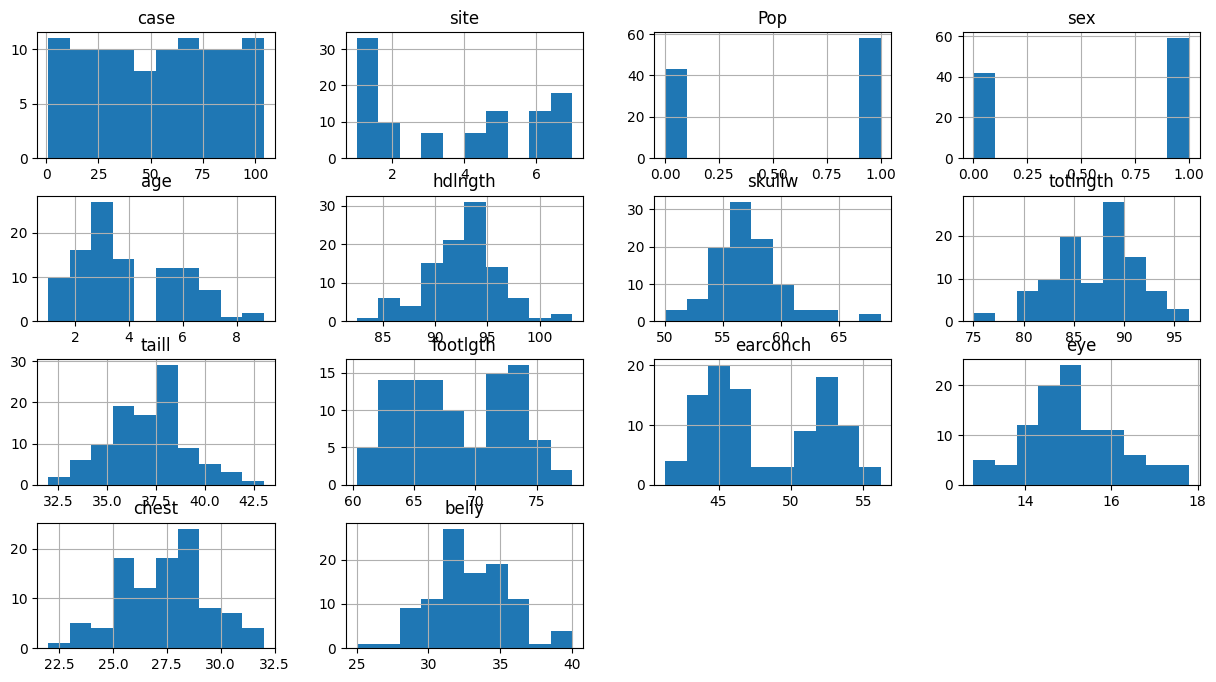

In [ ]:
df.hist(figsize=(15,8))

#Data spilting

In [ ]:
X = df.drop(columns='belly')
y = df[['belly']]

In [ ]:
# แบ่งข้อมูล Train และ Test/Val ก่อน (เช่น 80:20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# จากข้อมูลที่เหลือ (20%) แบ่งเป็น Test และ Validation (50:50 ของ 20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# สร้าง StandardScaler
scaler = StandardScaler()

# Fit-transform เฉพาะ Train set
X_train = scaler.fit_transform(X_train)

# Transform ชุด Validation และ Test
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# แสดงผลลัพธ์
print(f"Train set: X={X_train.shape[0]}, y={y_train.shape[0]}")
print(f"Validation set: X={X_val.shape[0]}, y={y_val.shape[0]}")
print(f"Test set: X={X_test.shape[0]}, y={y_test.shape[0]}")

Train set: X=70, y=70
Validation set: X=15, y=15
Test set: X=16, y=16


#Train model

In [ ]:
# Custom Callback สำหรับตรวจสอบ Gradients
class GradientLogger(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.gradients_history = []

    def on_epoch_end(self, epoch, logs=None):
        with tf.GradientTape() as tape:
            # บันทึกค่า gradients ของโมเดลในขณะฝึก
            tape.watch(self.model.trainable_variables)  # ให้ติดตาม variables ที่สามารถอัปเดตได้
            predictions = self.model(self.model.inputs, training=True)
            loss = self.model.compiled_loss(self.model.targets, predictions)

        gradients = tape.gradient(loss, self.model.trainable_variables)

        # หาค่าเฉลี่ยของ gradients ของแต่ละ layer
        gradient_mean = [tf.reduce_mean(tf.abs(grad)) for grad in gradients]

        # เก็บค่า gradients ที่ได้ในแต่ละ epoch
        self.gradients_history.append(gradient_mean)

        print(f"Epoch {epoch+1} - Mean Gradient: {np.mean(gradient_mean):.4f}")

# สร้างโมเดล
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# ใช้ Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# สร้าง instance ของ GradientLogger
gradient_logger = GradientLogger()

# ฝึกโมเดลและใช้ Custom Callback เพื่อตรวจสอบ gradients
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,           # จำนวน Epochs
    batch_size=32,        # Batch Size
    verbose=1,
    callbacks=[gradient_logger]  # ใส่ Callback ที่สร้างขึ้น
)

# ดูค่าของ gradients หลังการฝึกเสร็จ
print(f"Gradients History after training: {gradient_logger.gradients_history}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/3 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - loss: 1096.4702 - mae: 33.0430

ValueError: Passed in object <Variable path=sequential/dense/kernel, shape=(13, 64), dtype=float32, value=[[ 0.08972627 -0.18595083  0.16061124 -0.05496704 -0.06773382 -0.0041555
   0.170213    0.21252446  0.07027205  0.22826698  0.05536099 -0.02976041
  -0.06034302 -0.09616819  0.14719279  0.04994308 -0.18275069 -0.06226166
  -0.2578015   0.22076459  0.03183578  0.20379065 -0.13627405  0.21244629
   0.03684247 -0.09717616 -0.27250832  0.24240576  0.01378456 -0.15153772
  -0.15168092 -0.12315927  0.18276103  0.05096742 -0.18373121  0.1259619
  -0.06944975  0.05488208 -0.06382314  0.04065207  0.01894816 -0.05673605
   0.2708975  -0.24742956  0.06919807 -0.03242488  0.02544489  0.1159033
  -0.2118991  -0.09741338 -0.07393818  0.2373471   0.12921125  0.02166156
   0.05342659 -0.10538216 -0.14180441  0.15257415  0.06120718 -0.23595929
   0.26158944 -0.26554543 -0.17243592  0.01709683]
 [ 0.2021957   0.22060543  0.15781683  0.08925986 -0.16558151 -0.00604109
  -0.11204102 -0.10226547  0.14333639  0.08419316 -0.16424584  0.09733067
   0.23103951  0.19003397 -0.08464865  0.07499    -0.18844265 -0.12015416
  -0.05806008 -0.09781635 -0.19510369  0.02933734  0.16025834 -0.17850964
   0.14101264 -0.16675027  0.07585835 -0.15865095 -0.00068125 -0.23057052
  -0.03531814 -0.0752246   0.21486136  0.02036947  0.13256824  0.08320428
  -0.09319048 -0.03652921  0.18611513  0.24643336 -0.07471175  0.02648824
  -0.07105076  0.16123304 -0.03351222  0.19840619  0.23135366 -0.20371288
   0.12821075 -0.13645273 -0.05723798  0.23787631 -0.09662168 -0.27679542
  -0.06308199 -0.1143185  -0.06569932 -0.09337857 -0.15793341  0.09416431
   0.2525949   0.00340338  0.10529531 -0.10826717]
 [ 0.18173511 -0.12967429  0.10692135  0.20361046 -0.18414484 -0.23452063
   0.23682104 -0.18574768 -0.18465102  0.24384917 -0.00030395  0.09681644
   0.22362192  0.1574091   0.05112942  0.24571313 -0.18083234  0.14400952
   0.17989996 -0.2529297  -0.15824023  0.0159958   0.22586629 -0.01841686
  -0.23670311  0.22694394 -0.25685167  0.16145112  0.23484205 -0.07739432
   0.16134927 -0.01807011 -0.17678833 -0.12246241  0.11247056 -0.2672952
   0.25896245  0.16664007  0.09477405 -0.23854624 -0.09919554  0.03480943
  -0.1474424  -0.09601172  0.00322451 -0.21487784 -0.15960409  0.01826114
   0.21571605  0.19670866 -0.01932017  0.12148707  0.10484486  0.06166437
  -0.13089083 -0.17678271  0.06399284  0.14409599  0.2507763  -0.2201211
   0.08970179  0.03286032  0.1973348  -0.25851512]
 [-0.02064139 -0.01725769  0.06269249  0.23761874  0.0081965   0.08624538
   0.18491735  0.23096555  0.05315776 -0.02524504  0.2541557  -0.0134646
  -0.16412033  0.15851873 -0.22627844 -0.25902402 -0.13499285  0.1344076
   0.00086808 -0.19326489 -0.17415325 -0.25771797 -0.09179881 -0.08901941
   0.03058318  0.07677109 -0.06788283  0.0125867   0.18964162 -0.13194709
  -0.04696962 -0.0770416  -0.10583465 -0.278996    0.0940166   0.08024224
   0.0509783   0.1252429   0.16318032  0.2312254  -0.03250258  0.05611615
  -0.2857754   0.23124464 -0.20097269 -0.19172597 -0.04637636 -0.04478934
  -0.12414698 -0.0496744  -0.03260011  0.24963063 -0.03195089  0.12740497
  -0.2550007   0.1876779  -0.1667178  -0.25565216  0.18713987  0.15115404
  -0.2635282  -0.07910974  0.05486539 -0.08649489]
 [ 0.26748872  0.23897284  0.18292256 -0.11038114 -0.19119672  0.00140815
   0.1445083  -0.13641615  0.07046083  0.12929419  0.02787183  0.23604743
  -0.25267845 -0.19241033 -0.07239942 -0.09968463 -0.00499673  0.0496916
   0.00034962  0.12971753  0.23621471  0.22626148  0.15548618  0.25009397
   0.00776827  0.02570917 -0.19407837  0.23065175 -0.22902732  0.17248975
   0.07117248 -0.25937706 -0.07719604 -0.00717485 -0.10391789  0.14478816
   0.2543711   0.1988227   0.27585596  0.16888799 -0.07856087  0.01384872
  -0.2030934  -0.08232555 -0.09288891  0.10188816 -0.1639335  -0.16917743
   0.08275235  0.16995502 -0.07376245 -0.07258164  0.19096059 -0.25946137
   0.12591778  0.1984984  -0.12648153  0.18993108  0.14231624 -0.22199886
  -0.0112206   0.1701046  -0.20283768 -0.15367314]
 [ 0.0399962   0.14236715 -0.08076131  0.2634768   0.07339872 -0.2569551
  -0.2647918  -0.21762785  0.07459849  0.17916907  0.22556716 -0.08690941
   0.23499864  0.10324678 -0.23654944  0.05747369 -0.13415354 -0.26257187
  -0.23179594  0.22727828  0.13506408  0.21615177  0.10918774  0.26754656
  -0.06372429  0.2793384  -0.10808086  0.04726996 -0.16971591  0.13741435
   0.00506777  0.00874389  0.00917869  0.1551597   0.18648782 -0.20177798
   0.26343998 -0.20229246  0.22191593 -0.16556391 -0.2846257  -0.08131379
   0.02439772  0.25105187  0.218916   -0.16801023 -0.25447035 -0.11933698
   0.15532623 -0.2417733  -0.13251339 -0.18897693 -0.19590785 -0.06443858
   0.27894938 -0.15001774 -0.03873822 -0.2546099  -0.27313268 -0.07272725
  -0.10477673 -0.14845712  0.00904043 -0.21768315]
 [ 0.21436907  0.2751896   0.12296057 -0.09276801 -0.1045952   0.12603433
   0.20340234  0.09307805  0.04876694 -0.24440865 -0.17604043  0.06720351
  -0.13375029  0.12031116 -0.24978565  0.22284505  0.24216901  0.20691858
  -0.15169372  0.09022743  0.07789805  0.21689565  0.03693384  0.23854394
  -0.21043894  0.10184855 -0.19256282 -0.26793182 -0.20535421  0.04708407
   0.07372941 -0.01404974  0.27478135  0.23220001 -0.24154122 -0.06782348
  -0.04772522  0.09881146 -0.22095117 -0.20729615  0.03534953  0.22452188
   0.173986   -0.19975309 -0.22619465  0.26495257  0.02805337 -0.10153314
   0.07522433 -0.10553965 -0.1003322  -0.07699564  0.12069435 -0.16359851
  -0.11917645  0.12013668  0.15602891 -0.11947589  0.26513883 -0.00405477
   0.1942937  -0.18458953  0.29174185 -0.01270907]
 [-0.10395983 -0.15543237  0.21179837  0.27739966  0.24083191 -0.22659557
  -0.1639583  -0.15570691  0.23559752  0.18883874 -0.09155841  0.0023608
  -0.05927623  0.07554803 -0.27998272 -0.09051546 -0.09151804  0.14680639
  -0.05961393  0.15088338  0.11735853  0.13449775 -0.12234344 -0.02677339
  -0.00943136 -0.09195443 -0.2296433  -0.0703771  -0.14980318 -0.14587167
  -0.02793998 -0.2548961  -0.20312199 -0.2502491   0.1271087  -0.11638299
  -0.17052333  0.19998159  0.11530954 -0.0942193  -0.07451507  0.02804876
  -0.09554075  0.07732437  0.01188574 -0.18424721  0.03523075  0.0004146
  -0.20794794 -0.2013576   0.01038811  0.13863851 -0.07724053 -0.17676874
   0.19848901  0.2439135  -0.27802527  0.0524333  -0.05490541  0.17354073
   0.09597133 -0.18707688  0.14718871  0.24294366]
 [ 0.18106817 -0.17839389  0.02824397 -0.02181275  0.06485873  0.2524695
  -0.1710701   0.12467223 -0.1696696  -0.25295892 -0.2693143   0.10246583
   0.1072029  -0.0155656  -0.06043167  0.08655527 -0.05116818 -0.12762146
   0.0846809   0.2707357  -0.00500012  0.17328218 -0.00592255  0.23157902
   0.07097493  0.14038235 -0.15269949 -0.08286002  0.21329293  0.14746812
   0.08822293 -0.19528264  0.08563675  0.21031167 -0.17028163 -0.1595897
   0.03017943  0.15156037  0.13141866  0.09982007  0.00716896  0.24485739
  -0.12211617 -0.25916317  0.25210428  0.23974061 -0.02394648 -0.13823432
   0.24846597 -0.01529907 -0.10131861 -0.24450804 -0.10443541 -0.2538278
   0.11100867  0.10688386 -0.22876659  0.20118096  0.10726077 -0.2640583
   0.09416521  0.25934586 -0.00257549  0.2005974 ]
 [-0.17754094 -0.0700183   0.26885176  0.19883963  0.05996187 -0.08213966
  -0.11606633 -0.20797148  0.15189317  0.14806387  0.00555388 -0.05626888
   0.10801025  0.1611416   0.21943955  0.08497901 -0.05744626  0.26827624
  -0.12507534  0.06922485 -0.21649927 -0.05237791  0.02399272  0.25158778
  -0.08414079  0.13276339 -0.27275512  0.05785911  0.21423723 -0.23378249
  -0.13166526  0.21141116 -0.15673529  0.08539794  0.04921037 -0.0584154
  -0.21941653 -0.15722871  0.23090741 -0.11779986  0.13061604  0.13586523
  -0.06506773  0.13366036  0.07418729  0.16614573  0.16245225 -0.04743903
   0.14829513 -0.25564978  0.16357376  0.05073282 -0.0706835   0.17053683
  -0.0787365  -0.07167929  0.15419345  0.20264621 -0.14928994  0.2312175
   0.10336357  0.07048376 -0.17410873 -0.20965478]
 [ 0.08535864  0.07361679 -0.13539124  0.11930932  0.04041871  0.28865603
   0.03051987 -0.15982606 -0.13311295  0.26051107 -0.10630326 -0.03321079
   0.11367307 -0.21333529 -0.21397758 -0.058057   -0.14720944 -0.15583761
   0.2567845  -0.22346264  0.13412261 -0.24737562 -0.1474574   0.2352627
  -0.09244359 -0.16302323 -0.21525376 -0.04043027  0.28866455 -0.00466345
   0.14802799 -0.03182813  0.20549484 -0.08382057 -0.26139724  0.06002921
  -0.06598145  0.02303286 -0.28888792 -0.1334934   0.17781043 -0.21003789
   0.18157996  0.16573058 -0.03648481  0.16079655  0.07566248 -0.16003858
   0.20582993  0.08146366 -0.2361845   0.18658485  0.04872105 -0.1601667
   0.07288437 -0.0094291  -0.10999411 -0.23943834 -0.13772728 -0.00352281
  -0.20513901  0.28543177  0.22320741  0.23704056]
 [ 0.04197658  0.10659428 -0.23006254  0.12703358  0.2201205  -0.09574909
  -0.10587013  0.1628431   0.22624046  0.11263023 -0.21807426 -0.11419445
   0.2783264   0.01680113 -0.16543238  0.2707047  -0.00359821  0.0474386
   0.15054083  0.22006193 -0.16145922 -0.10002853  0.15255584  0.2206615
  -0.26203692 -0.07817248  0.25172672 -0.01011456 -0.2516212   0.15477501
   0.24969588 -0.0602876   0.30022544 -0.23513483  0.12364758 -0.07390931
  -0.06722922  0.09612708 -0.2513353  -0.0779983  -0.24938308 -0.16730562
   0.03658443  0.06404663  0.27509713 -0.03063917 -0.20863624  0.03519814
  -0.09304202  0.17644837 -0.24150671 -0.16527483 -0.0406126   0.15427434
  -0.242049   -0.12745073 -0.25073326  0.05797703  0.21603352  0.11785872
  -0.17709196 -0.08818461 -0.20856485 -0.26373148]
 [-0.15469754 -0.06425389 -0.07969637  0.08384492  0.01990742  0.09109712
  -0.00122796 -0.16467607 -0.0348681  -0.05219788 -0.25472763 -0.06605596
   0.2115675   0.03124122 -0.08578781 -0.21612602  0.22622855  0.22470209
   0.1369763   0.17763655 -0.09531506 -0.2528587  -0.13566259  0.10706669
  -0.14601676 -0.01382883 -0.27317145 -0.09680156  0.24586155  0.03426472
  -0.02003608 -0.12730262  0.23882899 -0.08044184  0.14644879  0.19873676
  -0.01558154  0.10559085 -0.24821544  0.16889322  0.13672225 -0.1590324
  -0.27002937 -0.15051307  0.14313507  0.18380594 -0.1458963   0.16249755
   0.2631312   0.03432917  0.22717333 -0.15029438 -0.11491676  0.01351406
   0.17739806  0.13403103 -0.07872974  0.20293896  0.08987516  0.09879001
  -0.09932311 -0.1324292   0.12546492  0.26945907]]> of type 'Variable', not tf.Tensor or tf.Variable or ExtensionType.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training and Validation MSE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.ylim(0, 10)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.summary()

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyRegressor


In [ ]:
# ใช้ LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=None, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
models